In [404]:
import pandas as pd
import numpy as np

In [405]:
books = pd.read_csv('data/books.csv')
ratings = pd.read_csv('data/ratings.csv')
users = pd.read_csv('data/users.csv')

C:\Users\thaia\AppData\Local\Temp\ipykernel_14960\2035899576.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('data/books.csv')


## Rename

In [406]:
books.rename(
    columns={'Year-Of-Publication':'year',
            'Book-Title':'title',
            'Book-Author':'author',
            'Publisher':'publisher',
            'ISBN':'isbn'
    }, inplace=True
)

In [407]:
ratings.rename(
    columns={'User-ID':'user_id',
            'ISBN':'isbn',
            'Book-Rating':'rating'
    }, inplace=True
)

users.rename(
    columns={'User-ID':'user_id',
            'Location':'location',
            'Age':'age'
    }, inplace=True
)

## Missing data

### Book

In [408]:
books.drop_duplicates(subset=['title','author'], inplace=True)

In [409]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251185 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   isbn         251185 non-null  object
 1   title        251185 non-null  object
 2   author       251183 non-null  object
 3   year         251185 non-null  object
 4   publisher    251183 non-null  object
 5   Image-URL-S  251185 non-null  object
 6   Image-URL-M  251185 non-null  object
 7   Image-URL-L  251182 non-null  object
dtypes: object(8)
memory usage: 17.2+ MB


In [410]:
books[books['author'].isnull()]

,isbn,title,author,year,publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [411]:
books.fillna('Unknown', inplace=True)

### Users

In [412]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


### Ratings

In [413]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   isbn     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## EDA

In [414]:
import matplotlib.pyplot as plt

In [482]:
author = books.groupby('author').size().sort_values(ascending=False).to_frame().head(10)

In [515]:
ratings_with_author = pd.merge(ratings,books,on = 'isbn').drop(columns=['year','publisher','Image-URL-S','Image-URL-M','Image-URL-L'])

In [516]:
test = ratings_with_author.groupby('author')['rating'].mean().to_frame().reset_index()


In [517]:
author_10 = pd.merge(author,test,on='author')

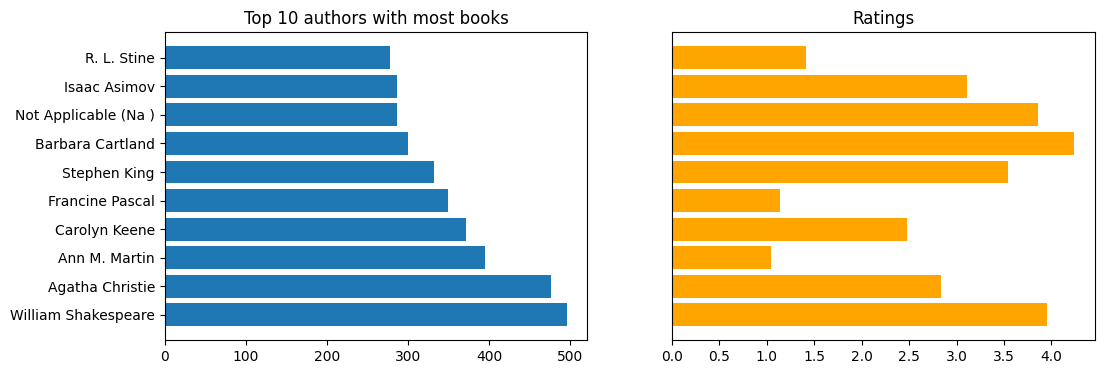

In [518]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(1,2,1)
plt.title('Top 10 authors with most books')

plt.barh(author_10['author'],author_10[0])

plt.subplot(1,2,2)
plt.title('Ratings')
plt.barh(author_10['author'],author_10['rating'],color = 'orange')
plt.yticks([])


plt.show()


In [523]:
rating_book = ratings_with_author.groupby('isbn').agg(
    {
        'user_id': 'count',  # Đếm số user
        'rating': 'mean'  # Tính trung bình rating
    }
).reset_index()

# Đổi tên cột
rating_book.rename(columns={'user_id': 'user_count', 'rating': 'avg_rating'}, inplace=True)


In [524]:
rating_book_gt_10 = rating_book[rating_book['user_count'] > 100].sort_values(by='avg_rating',ascending=False).head(10)

In [530]:
rating_book_gt_10 = pd.merge(rating_book_gt_10,books,on = 'isbn')

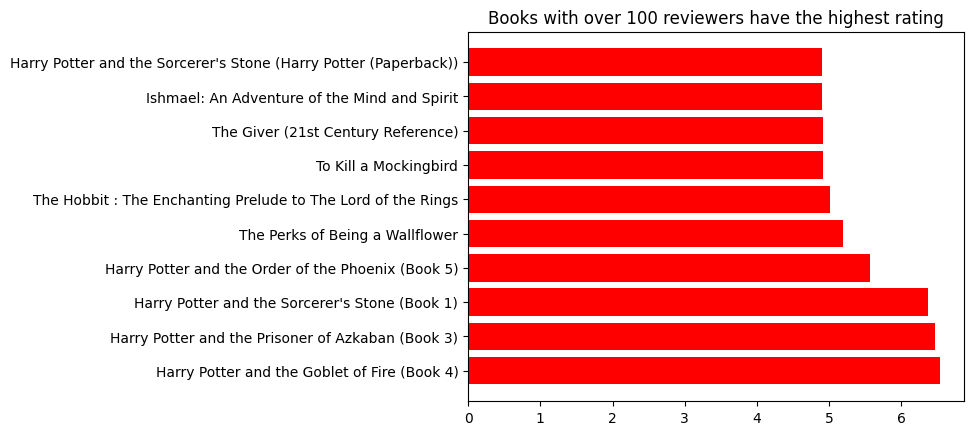

In [542]:
plt.title(label='Books with over 100 reviewers have the highest rating')
plt.barh(rating_book_gt_10['title'],rating_book_gt_10['avg_rating'],color = 'red')

plt.show()

In [585]:
book_per_year = books.groupby('year').size().to_frame(name='count')


In [587]:
book_per_year = book_per_year[
    (book_per_year.index != '0') & 
    (book_per_year.index != 'DK Publishing Inc') & 
    (book_per_year.index != 'Gallimard')
]

# Chuyển index về kiểu số để so sánh
book_per_year = book_per_year[(book_per_year.index.astype(int) <= 2024) & (book_per_year.index.astype(int) > 0) ]


In [594]:
book_per_year = book_per_year.tail(21)

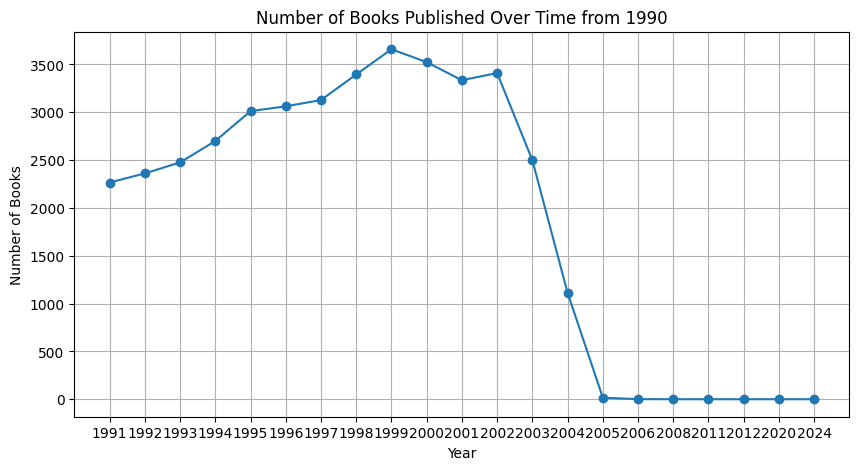

In [596]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Kích thước biểu đồ
plt.plot(book_per_year.index, book_per_year['count'], marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Over Time from 1990')
plt.grid(True)  # Hiển thị lưới
plt.show()


## Preprocessing

### Books

In [359]:
books['year']= books['year'].astype(str)

In [360]:
books['bag_of_words'] = books[['title','author','year','publisher']].agg(' '.join, axis=1)

In [361]:
isbn_statistic = ratings.groupby('isbn').agg(
    {
        'user_id':'count'
    }
).rename(columns={'user_id':'rating_count'})

In [362]:
famous_isbn = isbn_statistic[isbn_statistic['rating_count'] > 20].index

In [363]:
famous_isbn

Index(['0006493580', '000649840X', '0006512135', '0006513204', '0006514855',
       '0006547834', '0006550576', '0006550681', '0006550789', '0007108273',
       ...
       '8817106259', '8817131628', '8826703132', '8845205118', '8845247414',
       '884590184X', '8873122933', '8885989403', '950491036X', '9727722458'],
      dtype='object', name='isbn', length=7064)

In [364]:
books = books[books['isbn'].isin(famous_isbn)]

In [365]:
books.reset_index(drop=True, inplace=True)

### Ratings

In [366]:
ratings = ratings[ratings['isbn'].isin(famous_isbn)]

In [367]:
user_id_per_rate = ratings.groupby('user_id').size().sort_values(ascending= False)

In [368]:
user_id_per_rate[user_id_per_rate > 100].shape,user_id_per_rate.shape

((606,), (56706,))

In [369]:
user_id_per_rate = user_id_per_rate[user_id_per_rate > 100 ]

In [370]:
active_user = user_id_per_rate.index

In [371]:
ratings = ratings[ratings['user_id'].isin(active_user)]

In [372]:
ratings.reset_index(inplace=True)

In [373]:
ratings = ratings[ratings['user_id'] != 11676]

## Content-Based Recomendation System

In [374]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
        
        
class ContentBasedRecomendation():
    def __init__(self, books,top_n=10):
        self.books = books
        self.linear_kernel_function()
        self.top_n = top_n
    
    def linear_kernel_function(self):
    
        tfidf = TfidfVectorizer(stop_words='english')
        try: 
            matrix = tfidf.fit_transform(self.books['bag_of_words'])
            self.linear_kernel = linear_kernel(matrix, matrix)
        except KeyError:
            raise KeyError("Column 'bag_of_words' not found in DataFrame")

    
    def search(self, title):
        index = self.books[self.books['title'] == title].index[0]
        
        list = []
        for i in range(self.linear_kernel.shape[0]):
            if self.linear_kernel[index][i] > 0:
                list.append((i, self.linear_kernel[index][i]))
        sorted_list = sorted(list, key=lambda x: x[1], reverse=True)
        
        return sorted_list
    def recommend(self, title):
        books = []
        scores = []
        list = self.search(title)
        for j,i in enumerate(list[:self.top_n]):
           
            books.append((self.books.iloc[i[0]]['title'],self.books.iloc[i[0]]['Image-URL-M']))
            scores.append((list[j][1].item(),self.books.iloc[i[0]]['isbn']))
        
        
        return books,scores 

## Collaborative Filtering Recomendation System

In [375]:
from sklearn.metrics.pairwise import cosine_similarity

In [376]:
def normalize(user_item):
        mean_per_col = user_item.mean().values  # Tính trung bình mỗi cột
        user_item = user_item.sub(mean_per_col, axis=1)  # Chuẩn hóa bằng cách trừ trung bình

        user_item_with_NaN_0 = user_item.fillna(0)  # Thay NaN bằng 0 để tính cosine similarity
        similar_matrix = cosine_similarity(user_item_with_NaN_0.T)  # Ma trận tương đồng
        map_dict = {col: idx for idx, col in enumerate(user_item.columns)}

        for i in user_item.columns:
            for j in user_item.index:
                if pd.isna(user_item.at[j, i]):  # Chỉ xử lý ô bị thiếu
                    lst = sorted(
                        [(user_item.columns[k], similar_matrix[map_dict[i], k]) 
                        for k in range(len(similar_matrix))], 
                        key=lambda x: x[1], reverse=True
                    )[1:]  # Bỏ chính nó

                    ts = ms = count = 0
                    for item in lst:
                        val = user_item.at[j, item[0]]
                        if not pd.isna(val):
                            ts += item[1] * val
                            ms += abs(item[1])
                            count += 1
                        if count == 2:
                            break

                    user_item.at[j, i] = ts / ms if ms != 0 else 0

        return user_item.add(mean_per_col, axis=1)  # Cộng lại giá trị trung bình ban đầu

In [377]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

class Collaborative_Fitering:
    def __init__(self, books):
        self.books = books
        self.data = pd.read_csv('normalize_data.csv')
        self.user_item = self.data.pivot_table(columns='user_id',index='isbn',values='rating')
        self.user_item_sparse = csr_matrix(self.user_item)
        self.model = NearestNeighbors(algorithm='brute')
        self.model.fit(self.user_item_sparse)


    def recommend(self, title):
        
        isbn = self.books[self.books['title'] == title]['isbn'].values[0]
        
        
        obs = self.user_item.loc[isbn].values.reshape(1, -1)
        dist, suggestions = self.model.kneighbors(obs, n_neighbors=10)
        suggestions = suggestions.flatten()
        lst = []
        recommendations = []
        for stt,ind in enumerate(suggestions):
            book_isbn = self.user_item.iloc[ind].name
            book_title = self.books.loc[self.books['isbn'] == book_isbn, 'title']
            
            if not book_title.empty:
                recommendations.append((book_title.values[0],self.books.loc[self.books['isbn'] == book_isbn, 'Image-URL-S']))
                lst.append((dist.flatten()[stt].item(),book_isbn))
        
        return recommendations,lst

## Test

In [378]:
recomend = Collaborative_Fitering(books)

In [379]:
class HybridRecommendation():
    def __init__(self,books):
        self.books = books
        self.collab = Collaborative_Fitering(self.books)
        self.content = ContentBasedRecomendation(self.books)
    
    def normalize_result(self,lst):  
        scores = np.array([i[0] for i in lst])  
        min_val, max_val = np.min(scores), np.max(scores)  
        normalized_scores = (scores - min_val) / (max_val - min_val)  

        return {isbn: norm_score.item() for norm_score, (_, isbn) in zip(normalized_scores, lst)}
    def merge_dicts(self, dict1, dict2, weight1=0.4, weight2=0.6):
        merged = {}
        all_keys = set(dict1.keys()).union(set(dict2.keys()))
        
        for key in all_keys:
            value1 = dict1.get(key, 0) * weight1
            value2 = dict2.get(key, 0) * weight2
            merged[key] = value1 + value2
            
        return merged


    
    def recomend(self,title):
        
        _,list = self.collab.recommend(title)
        
        _,content = self.content.recommend(title)
        
        content = self.normalize_result(content)
        list = self.normalize_result(list)
        
        dict = self.merge_dicts(list,content)
        
        sorted_dict = sorted(dict.items(), key=lambda x: x[1], reverse=True)
        
        count = 0
        
        recommend = []
        for key,_ in sorted_dict:
            recommend.append((self.books[self.books['isbn'] == key]['title'].item(),self.books[self.books['isbn'] == key]['Image-URL-M'].item()))
            
            count = count + 1
            if count == 6:
                break
        return recommend

In [380]:
model = HybridRecommendation(books)

In [381]:
import pickle

with open("title.pkl", "wb") as f:
    pickle.dump(books, f)
